In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

Maybe we should find another way to reduce the amoung of dataframes.

In [24]:
# We load data
cpp_files = glob.glob(path.join("benchmarks", "cpp", "*.csv"))
dfs_cpp = [pd.read_csv(f) for f in cpp_files]
df_cpp = pd.concat(dfs_cpp, ignore_index=True)

In [26]:
df_cpp.query("buckets == 4 & threshold == 256")
df_cpp = df_cpp.drop(index=4202)
df_cpp.query("buckets == 4 & threshold == 256")

,buckets,threshold,run,integers,duration [ns]
4200,4,256,1,1,76
4201,4,256,2,1,65
4203,4,256,4,1,69
4204,4,256,5,1,66
4205,4,256,6,1,65
...,...,...,...,...,...
4495,4,256,6,536870912,114204484574
4496,4,256,7,536870912,112833732837
4497,4,256,8,536870912,113203284256
4498,4,256,9,536870912,112748886699


In [27]:
# Format data
df_cpp_mean = df_cpp.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()

Text(0.5, 1.0, 'Comparing multiple parameters for seq_shuffle')

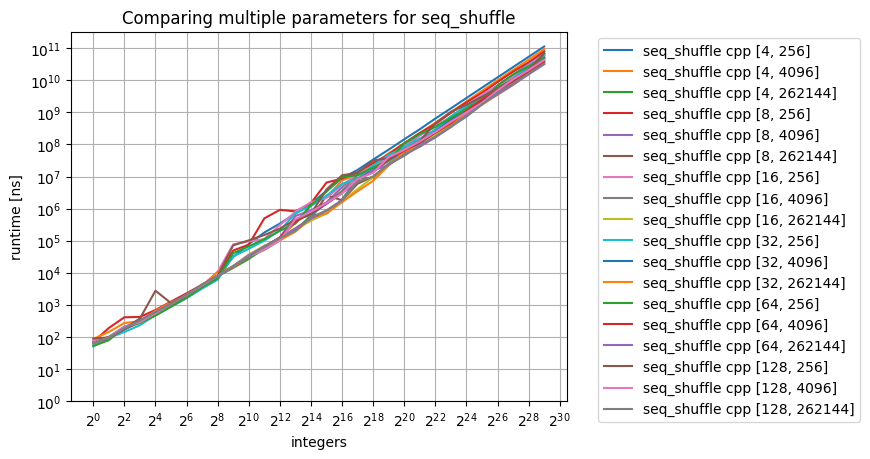

In [28]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [10 ** i for i in range(0, 12, 1)]

# df_cpp_mean[(df_cpp_mean["buckets"] == 4) & (df_cpp_mean["threshold"] == 256)]
# df_cpp_mean.loc[(df_cpp_mean["buckets"] == 4) & (df_cpp_mean["threshold"] == 256)]
ax = df_cpp_mean.query("buckets == 4 & threshold == 256").plot(x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 262144]")
df_cpp_mean.query("buckets == 8 & threshold == 256").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [8, 256]")
df_cpp_mean.query("buckets == 8 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [8, 4096]")
df_cpp_mean.query("buckets == 8 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [8, 262144]")
df_cpp_mean.query("buckets == 16 & threshold == 256").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [16, 256]")
df_cpp_mean.query("buckets == 16 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [16, 4096]")
df_cpp_mean.query("buckets == 16 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [16, 262144]")
df_cpp_mean.query("buckets == 32 & threshold == 256").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [32, 256]")
df_cpp_mean.query("buckets == 32 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [32, 4096]")
df_cpp_mean.query("buckets == 32 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [32, 262144]")
df_cpp_mean.query("buckets == 64 & threshold == 256").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [64, 256]")
df_cpp_mean.query("buckets == 64 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [64, 4096]")
df_cpp_mean.query("buckets == 64 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [64, 262144]")
df_cpp_mean.query("buckets == 128 & threshold == 256").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [128, 256]")
df_cpp_mean.query("buckets == 128 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [128, 4096]")
df_cpp_mean.query("buckets == 128 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [128, 262144]")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comparing multiple parameters for seq_shuffle")

As the result above doesn't help us much, let's look into runtime per integer.

In [29]:
# We add a new column
df_cpp_mean["runtime per integer [ns]"] = df_cpp_mean["duration [ns]"] / df_cpp_mean["integers"]

Text(0.5, 1.0, 'Comparing multiple parameters for seq_shuffle')

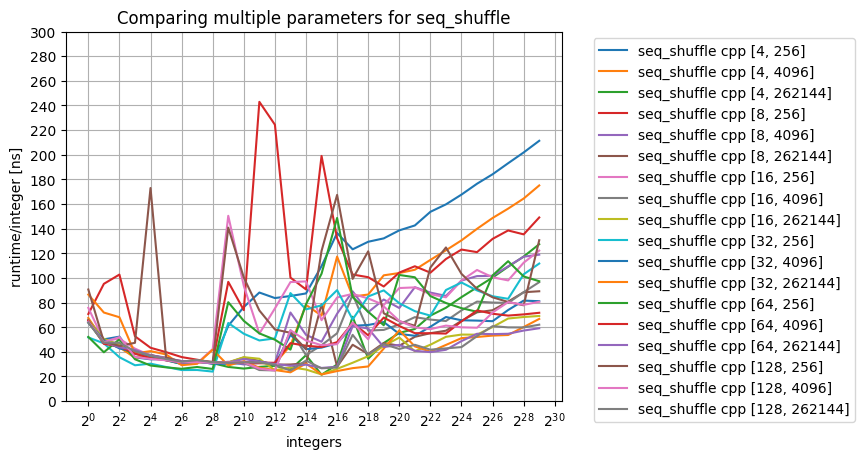

In [30]:
# We plot data
ax_2_xticks = ax_xticks
ax_2_yticks = [10 * i for i in range(0, 31, 2)]

ax_2 = df_cpp_mean.query("buckets == 4 & threshold == 256").plot(x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 262144]")
df_cpp_mean.query("buckets == 8 & threshold == 256").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [8, 256]")
df_cpp_mean.query("buckets == 8 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [8, 4096]")
df_cpp_mean.query("buckets == 8 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [8, 262144]")
df_cpp_mean.query("buckets == 16 & threshold == 256").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [16, 256]")
df_cpp_mean.query("buckets == 16 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [16, 4096]")
df_cpp_mean.query("buckets == 16 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [16, 262144]")
df_cpp_mean.query("buckets == 32 & threshold == 256").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [32, 256]")
df_cpp_mean.query("buckets == 32 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [32, 4096]")
df_cpp_mean.query("buckets == 32 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [32, 262144]")
df_cpp_mean.query("buckets == 64 & threshold == 256").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [64, 256]")
df_cpp_mean.query("buckets == 64 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [64, 4096]")
df_cpp_mean.query("buckets == 64 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [64, 262144]")
df_cpp_mean.query("buckets == 128 & threshold == 256").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [128, 256]")
df_cpp_mean.query("buckets == 128 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [128, 4096]")
df_cpp_mean.query("buckets == 128 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [128, 262144]")

ax_2.set_xscale("log", base=2)
#ax_2.set_yscale("log", base=10)
ax_2.set_xticks(ax_2_xticks)
ax_2.set_yticks(ax_2_yticks)
ax_2.grid(True)
ax_2.set_xlabel("integers")
ax_2.set_ylabel("runtime/integer [ns]")
ax_2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax_2.set_title("Comparing multiple parameters for seq_shuffle")

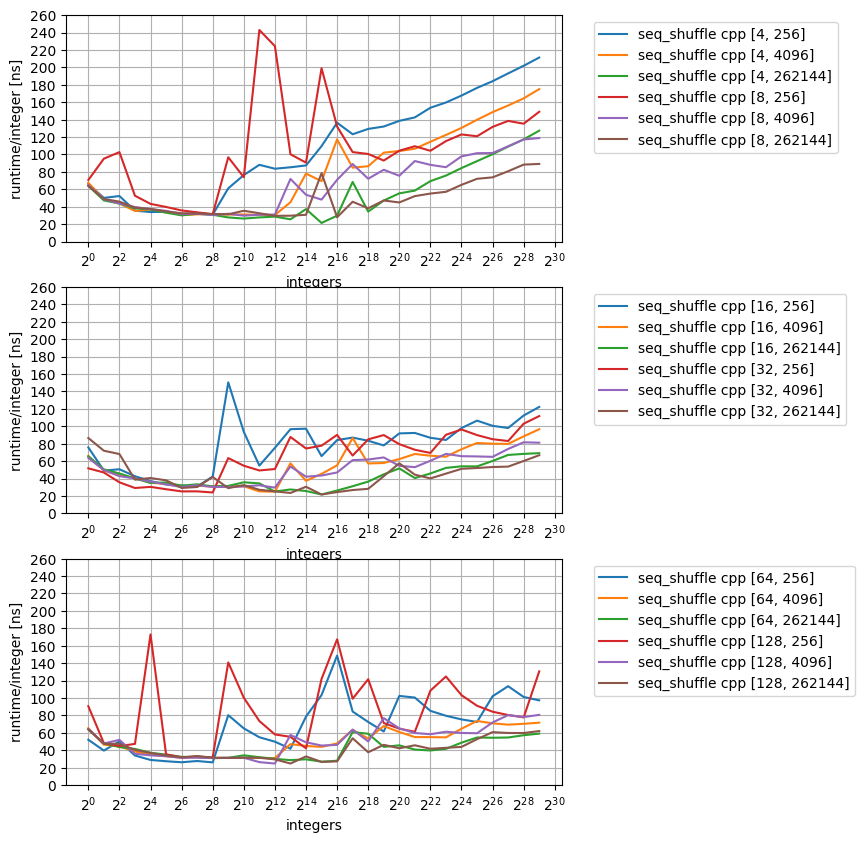

In [44]:
# We plot data
ax_2_xticks = ax_xticks
ax_2_yticks = [10 * i for i in range(0, 27, 2)]

fig, ax_2 = plt.subplots(nrows=3, ncols=1)

df_cpp_mean.query("buckets == 4 & threshold == 256").plot(ax=ax_2[0], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax_2[0], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax_2[0], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 262144]")
df_cpp_mean.query("buckets == 8 & threshold == 256").plot(ax=ax_2[0], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [8, 256]")
df_cpp_mean.query("buckets == 8 & threshold == 4096").plot(ax=ax_2[0], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [8, 4096]")
df_cpp_mean.query("buckets == 8 & threshold == 262144").plot(ax=ax_2[0], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [8, 262144]")

df_cpp_mean.query("buckets == 16 & threshold == 256").plot(ax=ax_2[1], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [16, 256]")
df_cpp_mean.query("buckets == 16 & threshold == 4096").plot(ax=ax_2[1], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [16, 4096]")
df_cpp_mean.query("buckets == 16 & threshold == 262144").plot(ax=ax_2[1], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [16, 262144]")
df_cpp_mean.query("buckets == 32 & threshold == 256").plot(ax=ax_2[1], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [32, 256]")
df_cpp_mean.query("buckets == 32 & threshold == 4096").plot(ax=ax_2[1], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [32, 4096]")
df_cpp_mean.query("buckets == 32 & threshold == 262144").plot(ax=ax_2[1], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [32, 262144]")

df_cpp_mean.query("buckets == 64 & threshold == 256").plot(ax=ax_2[2], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [64, 256]")
df_cpp_mean.query("buckets == 64 & threshold == 4096").plot(ax=ax_2[2], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [64, 4096]")
df_cpp_mean.query("buckets == 64 & threshold == 262144").plot(ax=ax_2[2], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [64, 262144]")
df_cpp_mean.query("buckets == 128 & threshold == 256").plot(ax=ax_2[2], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [128, 256]")
df_cpp_mean.query("buckets == 128 & threshold == 4096").plot(ax=ax_2[2], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [128, 4096]")
df_cpp_mean.query("buckets == 128 & threshold == 262144").plot(ax=ax_2[2], x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [128, 262144]")

for ax_i in ax_2:
    ax_i.set_xscale("log", base=2)
    #ax_i.set_yscale("log", base=10)
    ax_i.set_xticks(ax_2_xticks)
    ax_i.set_yticks(ax_2_yticks)
    ax_i.grid(True)
    ax_i.set_xlabel("integers")
    ax_i.set_ylabel("runtime/integer [ns]")
    ax_i.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

fig.set_figheight(10)